# PycWB Tutorial

## 0. Install dependencies

<!-- You can create the environment with conda, this will cost around 10 mins

```python
!pip install -q condacolab
import condacolab
condacolab.install()
```

```python
!conda install -c conda-forge -y -q healpix_cxx=3.81 root=6.26.10 cmake pkg-config
!conda install -c conda-forge -y -q nds2-client python-nds2-client
```

Here, to save the time. We download the ROOT binaries and other dependencies with `apt-get` -->

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [ ]:
!mamba install -c conda-forge -y -q healpix_cxx=3.81 root=6.26.10 cmake pkg-config
!mamba install -c conda-forge -y -q nds2-client python-nds2-client

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

done
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


### Install pycwb package

In [ ]:
!pip install pycwb
# !pip install "astropy<5.3" "matplotlib<3.7.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

### Install deps for modules

In [ ]:
!pip install -q basemap healpy tensorflow

## 1. Run your first example

First, we download the example user parameter file

In [ ]:
user_parameters = """
analysis: "2G"
cfg_search: "r"

optim: False

###### network configuration ######
ifo: ["L1","H1"]
refIFO: "L1"

inRate: 16384
# lags
lagSize: 1
lagStep: 1.
lagOff: 0
lagMax: 0

# superlags
slagSize: 0 # number of super lags (simulation=1) - if slagSize=0 -> Standard Segments
slagMin: 0
slagMax: 0
slagOff: 0

# job
segLen: 1200
segMLS: 600
segTHR: 200
segEdge: 10

# frequency
fLow: 16.
fHigh: 1024.


levelR: 3
l_low: 4 # low frequency resolution level		// std (sthr = 2)
l_high: 10 # high frequency resolution level	// std (sthr = 8)

wdmXTalk: "wdmXTalk/OverlapCatalog16-1024.bin"

healpix: 7

###### cWB production thresholds & regulators ######

bpp: 0.001
subnet: 0.5
subcut: 0.0
netRHO: 5.5
# cedRHO: 5.0
netCC: 0.5
Acore: 1.7
Tgap: 0.2
Fgap: 128.0
delta: 0.5
cfg_gamma: -1.0
LOUD: 300

pattern: 5

iwindow: 30

nSky: 196608

# simulation
# simulation: None
nfactor: 1
"""

with open('user_parameters.yaml', 'w') as fp:
    fp.write(user_parameters)

In [ ]:
import os

import pycwb
from pycwb.config import Config
from pycwb.modules.logger import logger_init

if not os.environ.get('HOME_WAT_FILTERS'):
    pyburst_path = os.path.dirname(os.path.abspath(pycwb.__file__))
    os.environ['HOME_WAT_FILTERS'] = f"{os.path.abspath(pyburst_path)}/vendor"

logger_init()

config = Config('./user_parameters.yaml')

Welcome to JupyROOT 6.26/10
Loading wavelet library
Trying to load wavelet library from /usr/local/lib/python3.10/site-packages/lib/wavelet.so


/usr/local/lib/python3.10/site-packages/ROOT/_facade.py:153: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  return _orig_ihook(name, *args, **kwds)


23-11-25 21:36:40 - logger_init - INFO - Logging initialized
23-11-25 21:36:40 - logger_init - INFO - Logging level: INFO
23-11-25 21:36:40 - logger_init - INFO - Logging file: None
23-11-25 21:36:43 - check_MRA_catalog - INFO - Checking MRA catalog
23-11-25 21:36:44 - load_MRA - INFO - Loading catalog of WDM cross-talk coefficients: /usr/local/lib/python3.10/site-packages/pycwb/vendor/wdmXTalk/OverlapCatalog16-1024.bin


generate injected data for each detector with given parameters in config

In [ ]:
from pycwb.modules.read_data import read_from_catalog, read_from_online
from gwpy.timeseries import TimeSeries

import requests
from gwosc.locate import get_urls
t0 = 1126259462.4

data = []
for ifo in config.ifo:
  url = get_urls(ifo, t0, t0)[-1]

  print('Downloading: ' , url)
  fn = os.path.basename(url)
  with open(fn,'wb') as strainfile:
      straindata = requests.get(url)
      strainfile.write(straindata.content)

  strain = TimeSeries.read(fn,format='hdf5.gwosc')
  d = strain.crop(t0-150, t0+150)
  d_resampled = d.resample(2048)
  data.append(d_resampled)

Downloading:  https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5
Downloading:  https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5


apply data conditioning to the data

23-11-25 21:36:57 - data_conditioning - INFO - Start data conditioning in parallel
23-11-25 21:37:05 - data_conditioning - INFO - -------------------------------------------------------
23-11-25 21:37:05 - data_conditioning - INFO - Data Conditioning Time: 7.45 seconds
23-11-25 21:37:05 - data_conditioning - INFO - -------------------------------------------------------


((<pycwb.types.time_frequency_series.TimeFrequencySeries at 0x79720dbe68c0>,
  <pycwb.types.time_frequency_series.TimeFrequencySeries at 0x79720dbe6740>),
 (<pycwb.types.time_frequency_series.TimeFrequencySeries at 0x79720dbe5c00>,
  <pycwb.types.time_frequency_series.TimeFrequencySeries at 0x79720dbe6200>))

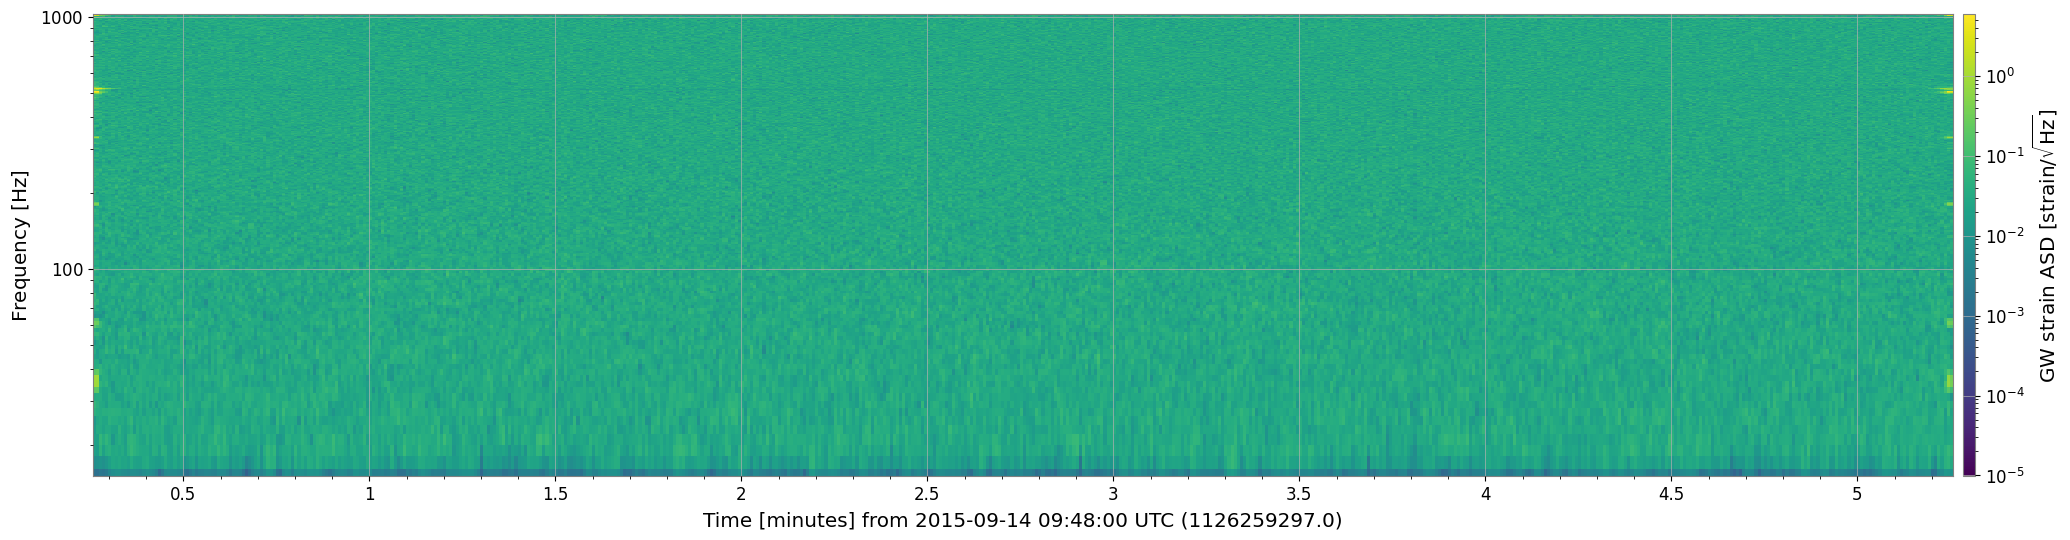

In [ ]:
from pycwb.modules.data_conditioning import data_conditioning
from pycwb.modules.plot import plot_spectrogram

strains, nRMS = data_conditioning(config, data)

# plot the spectrogram for L1
plt = plot_spectrogram(strains[0], gwpy_plot=True)
ax = plt.gca()
ax.set_ylim(15,1024)

strains, nRMS

calculate coherence

In [ ]:
from pycwb.modules.coherence import coherence

# calculate coherence
fragment_clusters = coherence(config, strains, nRMS)

23-11-25 21:37:45 - coherence - INFO - Start coherence in parallel
23-11-25 21:37:59 - _coherence_single_res - INFO - level : 10	 rate(hz) : 2	 layers : 1024	 df(hz) : 1.000000	 dt(ms) : 500.000000 
max energy in units of noise variance: 7.99343 
thresholds in units of noise variance: Eo=8.47962 Emax=16.9592 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |        2 |     22 
Coherence time for single level: 13.911077 s
23-11-25 21:37:59 - _coherence_single_res - INFO - level : 8	 rate(hz) : 8	 layers : 256	 df(hz) : 4.000000	 dt(ms) : 125.000000 
max energy in units of noise variance: 8.53839 
thresholds in units of noise variance: Eo=8.4808 Emax=16.9616 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |       12 |    153 
Coherence time for single level: 13.794049 s
23-11-25 21:38:00 - _coherence_single_res - INFO - level : 9	 rate(hz) : 4	 layers : 512	 df(hz) : 2.000000	 dt(ms) : 250.000000 
max energy in units of noise variance: 8.26642 
thresholds in units of n

In [ ]:
# %matplotlib inline
# from gwpy.spectrogram import Spectrogram
# for fragment_cluster in fragment_clusters:
#   for cluster in fragment_cluster.clusters:
#       merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

#       plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
#       plt.colorbar()

supercluster

In [ ]:
from pycwb.modules.super_cluster import supercluster
from pycwb.types.network import Network

network = Network(config, strains, nRMS)

pwc_list = supercluster(config, network, fragment_clusters, strains)

23-11-25 21:38:12 - set_time_shift - INFO - lag step: 1.0
23-11-25 21:38:12 - set_time_shift - INFO - number of time lags: 1
23-11-25 21:38:14 - sparse_table_from_fragment_clusters - INFO - ----------------------------------------
23-11-25 21:38:14 - sparse_table_from_fragment_clusters - INFO - Sparse series time: 2.31 s
23-11-25 21:38:14 - sparse_table_from_fragment_clusters - INFO - ----------------------------------------
23-11-25 21:38:17 - supercluster - INFO - -> Processing lag=0 ...
23-11-25 21:38:17 - supercluster - INFO -    --------------------------------------------------
23-11-25 21:38:17 - supercluster - INFO -     coher clusters|pixels      :     74|961
23-11-25 21:38:17 - supercluster - INFO -     super clusters|pixels      :      6|440
23-11-25 21:38:17 - supercluster - INFO -    defrag clusters|pixels      :      6|440
23-11-25 21:38:18 - supercluster - INFO -    subnet clusters|pixels      :      2|350
23-11-25 21:38:18 - supercluster - INFO - Supercluster done
23-11

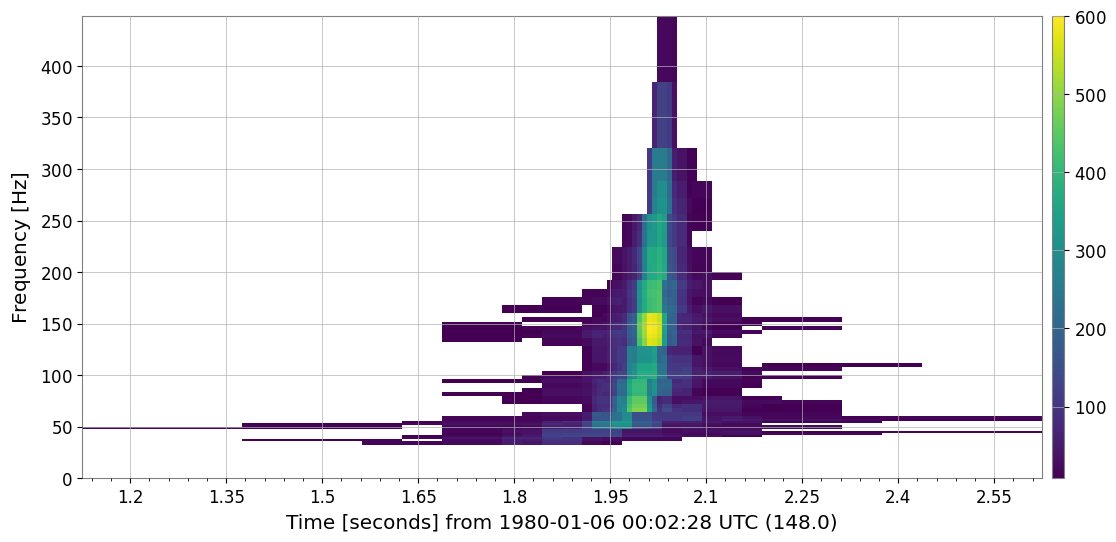

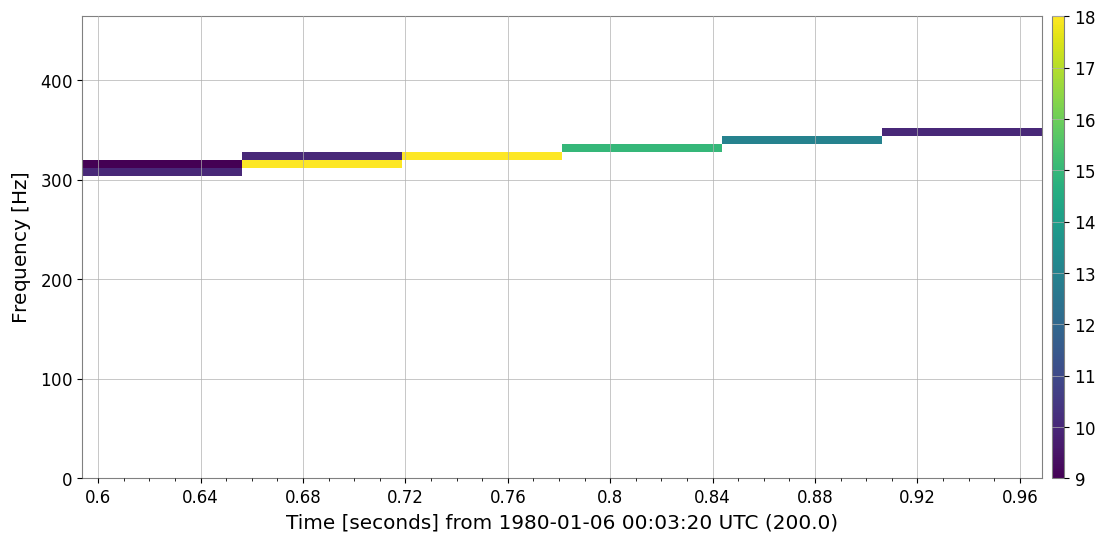

In [ ]:
%matplotlib inline
from gwpy.spectrogram import Spectrogram

for cluster in pwc_list[0].clusters:
    merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

    plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
    plt.colorbar()

Likelihood

In [ ]:
from pycwb.modules.likelihood import likelihood

events, clusters, skymap_statistics = likelihood(config, network, pwc_list)

23-11-25 21:39:11 - likelihood - INFO - -------------------------------------------------------
23-11-25 21:39:11 - likelihood - INFO - -> Processing 2 clusters in lag=0
23-11-25 21:39:11 - likelihood - INFO -    ----------------------------------------------------
23-11-25 21:39:20 - _likelihood - INFO - Selected core pixels: 1
23-11-25 21:39:20 - _likelihood - INFO -    cluster-id|pixels:     1|326
23-11-25 21:39:20 - _likelihood - INFO - 	 -> SELECTED !!!
23-11-25 21:39:25 - _likelihood - INFO - Selected core pixels: 0
23-11-25 21:39:25 - _likelihood - INFO -    cluster-id|pixels:     2|24
23-11-25 21:39:25 - _likelihood - INFO - 	 <- rejected    
23-11-25 21:39:25 - likelihood - INFO - -------------------------------------------------------
23-11-25 21:39:25 - likelihood - INFO - Total events: 1
23-11-25 21:39:25 - likelihood - INFO - Total time: 13.29 s
23-11-25 21:39:25 - likelihood - INFO - -------------------------------------------------------
mchirp_2g : 1 1 3.70e+01 2.456 15

plot statistics

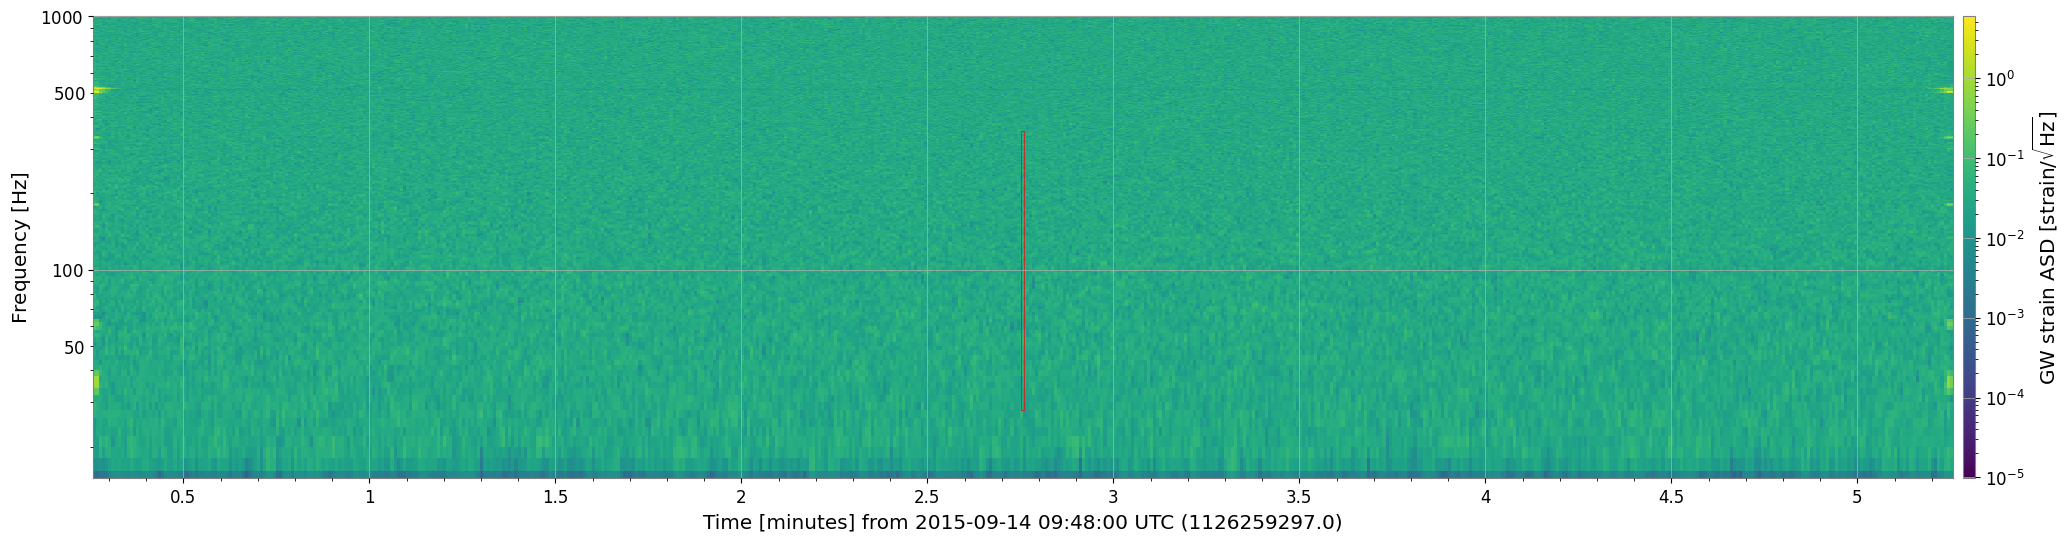

In [ ]:
%matplotlib inline
from pycwb.modules.plot import plot_event_on_spectrogram

plt = plot_event_on_spectrogram(strains[0], events)
plt.show()

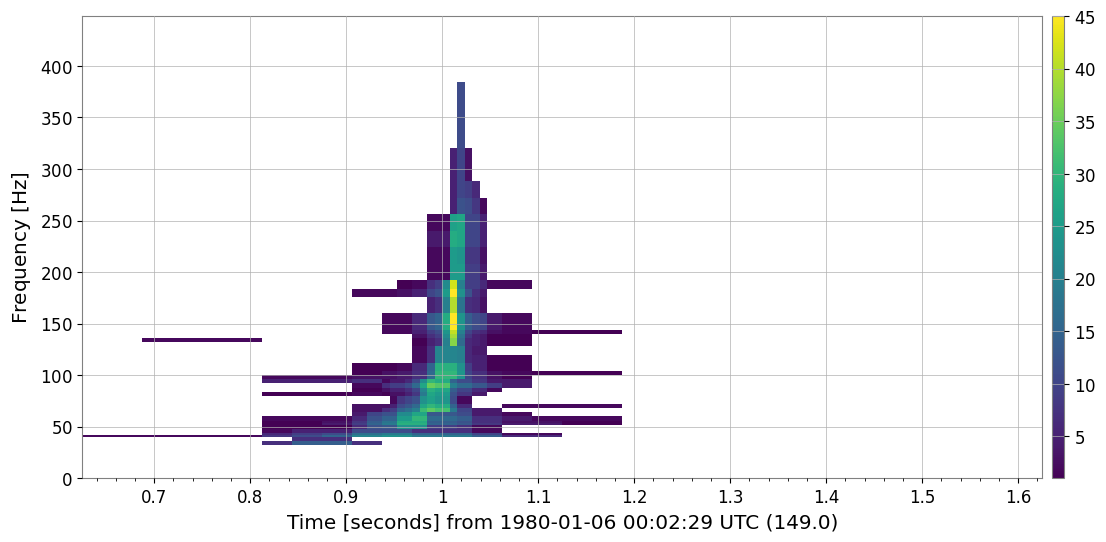

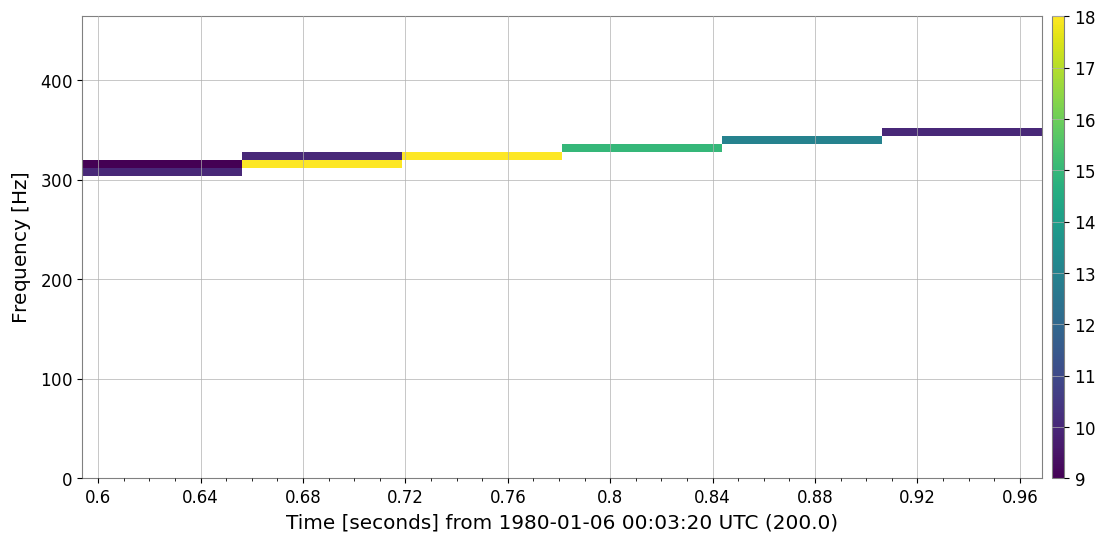

In [ ]:
%matplotlib inline
from gwpy.spectrogram import Spectrogram

for cluster in clusters:
    merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

    plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
    plt.colorbar()

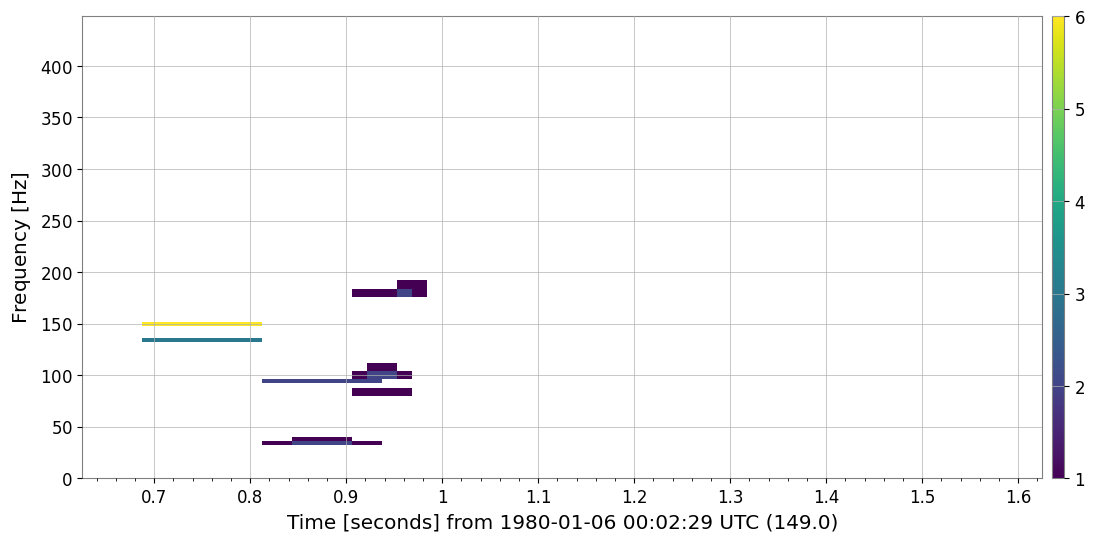

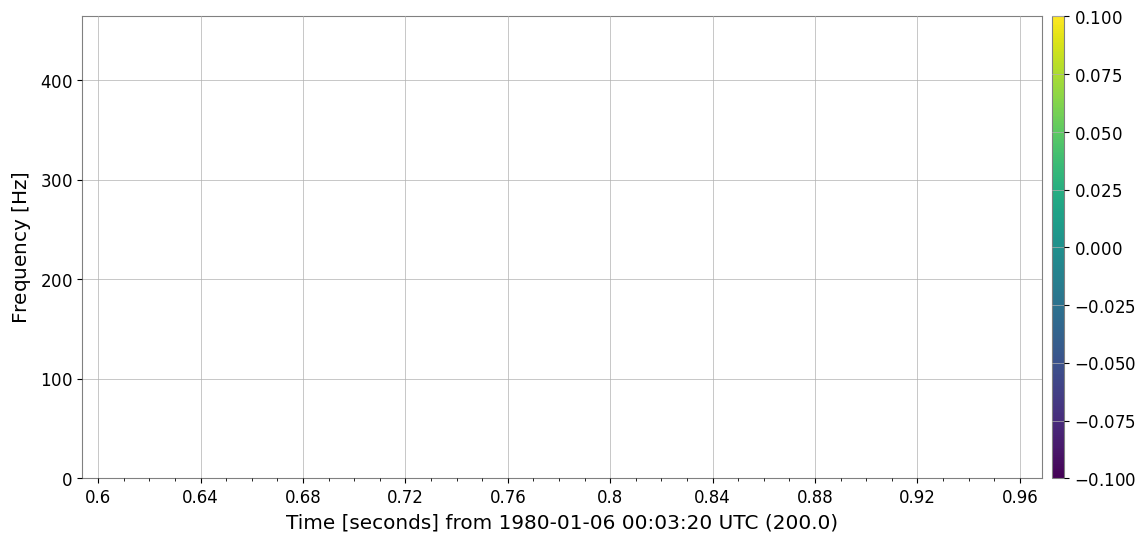

In [ ]:
%matplotlib inline
from gwpy.spectrogram import Spectrogram

for cluster in clusters:
    merged_map, start, dt, df = cluster.get_sparse_map("null")

    plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
    plt.colorbar()

(149.75, 150.25)

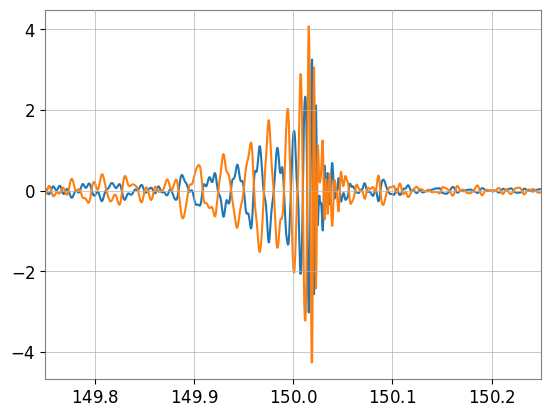

In [ ]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt

event = events[0]
cluster = clusters[0]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
                                               'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

In [ ]:
events

[Event(nevent=1, ndim=2, run=0, rho=[16.82819938659668, 16.205471887395742, 0], netcc=[0, 0, 0], neted=[0, 0, 0, 0, 0], gnet=0.5499611496925354, anet=0.14632120728492737, inet=0.0, ecor=566.3796997070312, norm=6.39865255355835, ECOR=0.0, penalty=0, likelihood=641.0653076171875, factor=0.0, range=[0], chirp=[0, 36.999935150146484, 2.456249713897705, 0.9884099960327148, 0.8796992301940918, 0.9492351412773132], eBBH=[], usize=0.0, ifo_list=[], eventID=[1, 0], type=[1], name=[], log=[], rate=[0, 0], volume=[326, 133], size=[135, 135], gap=[0, 0], lag=[0.0, 0.0, 0.0, 0.0], slag=[0, 0, 0], strain=[6.759318129808197e-45], phi=[353.8636363636364, 0, 134.62930901441723, 291.796875], theta=[155.69633519657742, 0, -65.69633519657742, 156.44354248046875], psi=[0.0], iota=[0.0], bp=[-0.5329943957257304, 0.7909650695827076], bx=[-0.22364054977265513, 0.11136299470683837], time=[1126259462.396225, 1126259462.403501], gps=[1126259312.3999023, 1126259312.3999023], right=[149.75, 149.75], left=[149.75, 